In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ls

Relax Inc..docx                   takehome_user_engagement.csv
Relax Inc.ipynb                   takehome_users.csv
Untitled1.ipynb                   test.csv
relax_data_science_challenge.pdf


In [3]:
df = pd.read_csv('takehome_users.csv' , encoding = 'ISO-8859-1')
useage = pd.read_csv('takehome_user_engagement.csv' , encoding = 'ISO-8859-1' , )

In [4]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df['creation_time'] = pd.to_datetime(df['creation_time'])

In [7]:
useage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
useage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [9]:
useage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [10]:
useage['time_stamp'] = pd.to_datetime(useage['time_stamp'])
useage.set_index('time_stamp' , inplace= True)

In [11]:
useage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


In [12]:
test = useage.groupby('user_id').resample('7d').sum()

In [13]:
test.visited.unique()

array([1, 0, 3, 2, 4, 5, 6, 7])

In [14]:
test.head()

user_id  visited
user_id time_stamp                           
1       2014-04-22 03:53:30        1        1
2       2013-11-15 03:45:04        2        1
        2013-11-22 03:45:04        0        0
        2013-11-29 03:45:04        2        1
        2013-12-06 03:45:04        2        1

In [15]:
adopted_user = test[test.visited >= 3]

In [16]:
adopted_user['object_id'] = adopted_user['user_id'] / adopted_user['visited']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
adopted_user['object_id'] = adopted_user['object_id'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
del adopted_user['user_id']

In [19]:
len(adopted_user['object_id'].unique())

1472

In [20]:
df['adopted_user'] = df['object_id'].apply(lambda x : 1 if x in adopted_user['object_id'] else 0)

In [21]:
df['adopted_user'].value_counts()

0    10528
1     1472
Name: adopted_user, dtype: int64

In [22]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

In [23]:
df[df['invited_by_user_id'].isnull()]['creation_source'].value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [24]:
df[~(df['invited_by_user_id'].isnull())]['creation_source'].value_counts()

ORG_INVITE      4254
GUEST_INVITE    2163
Name: creation_source, dtype: int64

In [25]:
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'])

In [26]:
df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1


There are two features with missing values and I decided to remove them from the training set. 

"last_session_creation_time" is unix timestamp of last login. Originally was restored as float and after converting its data type to datetime, it represented bogus values. 

As for "invited_by_user_id", there can't be any values for two categories of "SIGNUP" and "SIGNUP_GOOGLE_AUTH". That's around 29% of our data. 

In [27]:
df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


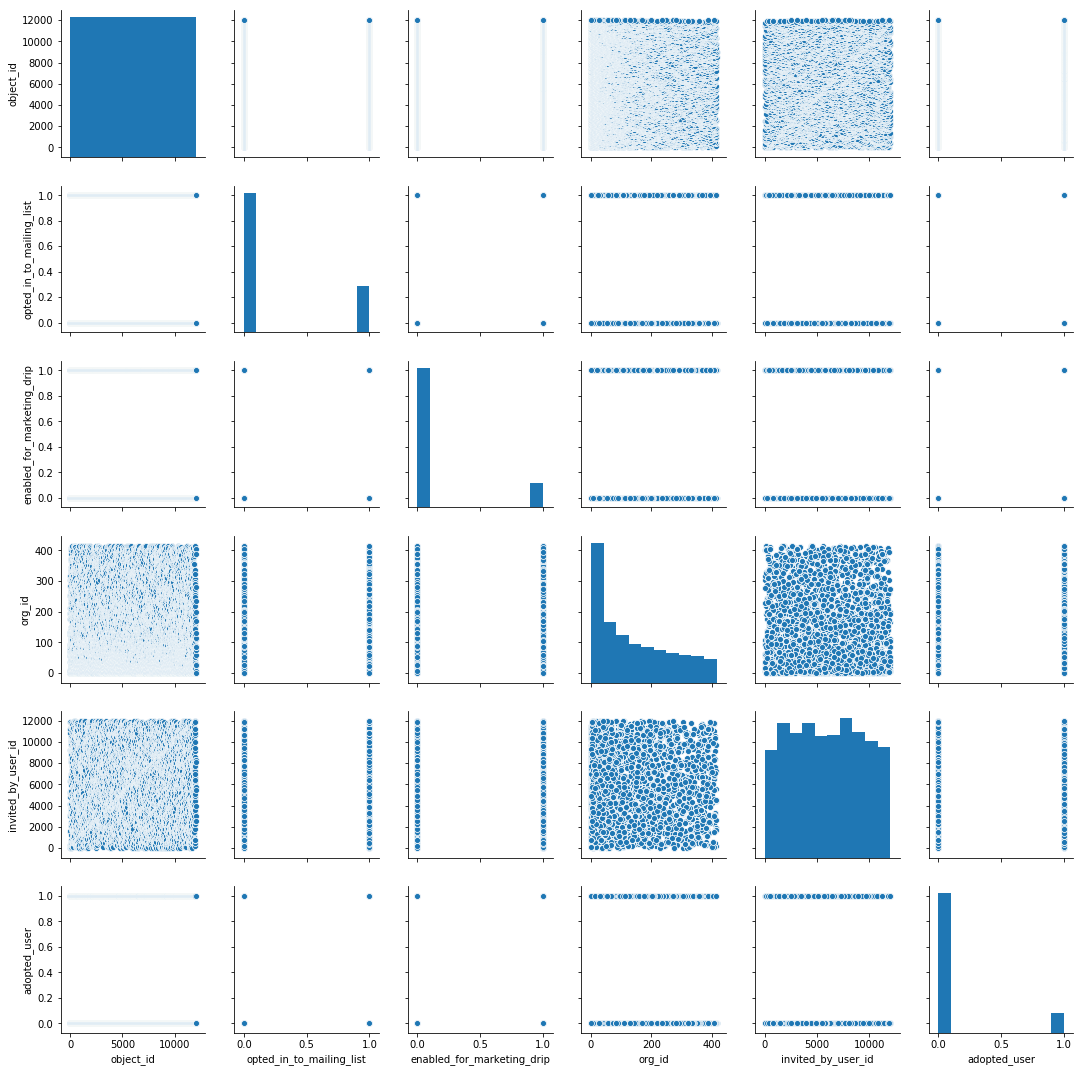

In [29]:
sns.pairplot(df)

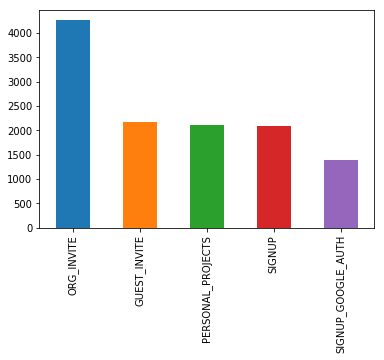

In [30]:
df['creation_source'].value_counts().plot(kind = 'bar')

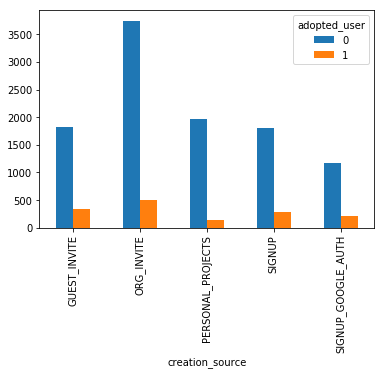

In [31]:
_ = df.groupby(['adopted_user' , 'creation_source'])['adopted_user'].count().unstack().T.plot(kind = 'bar')

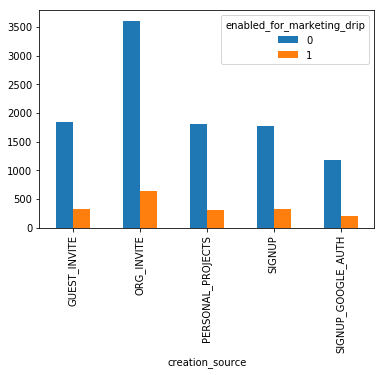

In [32]:

df.groupby(['creation_source','enabled_for_marketing_drip'])['creation_source'].count().unstack().plot(kind = 'bar')

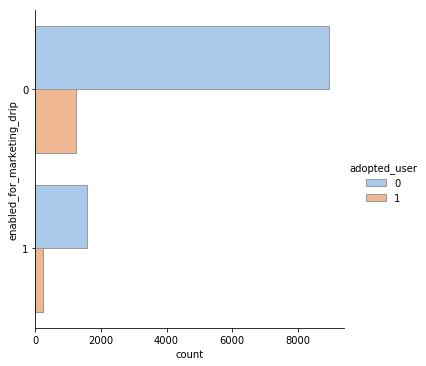

In [33]:
_ = sns.catplot(y='enabled_for_marketing_drip', hue='adopted_user', kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

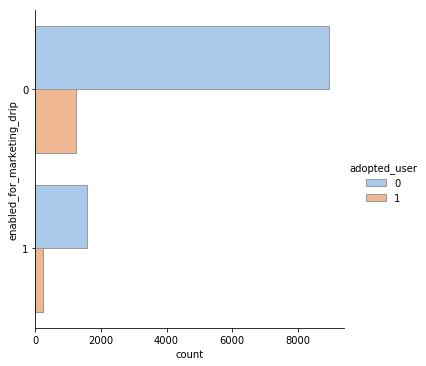

In [34]:
sns.catplot(y="enabled_for_marketing_drip", hue="adopted_user", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

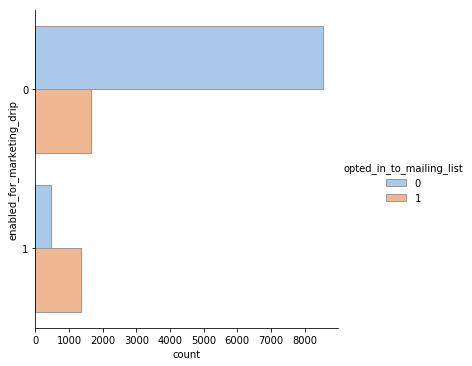

In [35]:
sns.catplot(y="enabled_for_marketing_drip", hue="opted_in_to_mailing_list", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [28]:
corr = df.corr()
corr

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,1.000000,-0.032370,-0.022040,0.004110,0.018699,0.001665
opted_in_to_mailing_list,-0.032370,1.000000,0.483529,0.003432,0.004699,0.010412
enabled_for_marketing_drip,-0.022040,0.483529,1.000000,0.009275,0.003687,0.005118
org_id,0.004110,0.003432,0.009275,1.000000,-0.057780,0.063510
invited_by_user_id,0.018699,0.004699,0.003687,-0.057780,1.000000,0.010668
adopted_user,0.001665,0.010412,0.005118,0.063510,0.010668,1.000000


In [29]:
(abs(corr.values) >= 0.4) & (abs(corr.values)  < 1)

array([[False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False,  True, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [38]:
df.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145,0.122667
std,3464.24595,0.432742,0.356432,124.056723,3383.761968,0.328068
min,1.00000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000,0.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000,0.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,1.000000


In [30]:
categorical = ['creation_source' , 'opted_in_to_mailing_list' , 'enabled_for_marketing_drip' ]

df_dummy = pd.get_dummies(df, columns=categorical)

In [31]:
df_dummy

,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1970-01-01 00:00:01.398138810,11,10803.0,0,1,0,0,0,0,0,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1970-01-01 00:00:01.396237504,1,316.0,1,0,1,0,0,0,1,0,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1970-01-01 00:00:01.363734892,94,1525.0,0,0,1,0,0,0,1,0,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1970-01-01 00:00:01.369210168,1,5151.0,0,1,0,0,0,0,1,0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1970-01-01 00:00:01.358849660,193,5240.0,0,1,0,0,0,0,1,0,1,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1970-01-01 00:00:01.387424226,197,11241.0,0,1,0,0,0,0,1,0,1,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,1970-01-01 00:00:01.356009872,37,NaN,0,0,0,0,1,0,1,0,0,1
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,NaT,74,NaN,0,0,0,1,0,0,0,1,0,1
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,NaT,302,NaN,0,0,0,1,0,0,1,0,1,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1970-01-01 00:00:01.401833283,318,4143.0,1,0,1,0,0,0,0,1,0,1


In [32]:
df_dummy.drop(['opted_in_to_mailing_list_0' , 'enabled_for_marketing_drip_0' , 'creation_source_GUEST_INVITE'], 
       axis = 1 , inplace= True)

In [33]:
df_dummy.head()

,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_1,enabled_for_marketing_drip_1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1970-01-01 00:00:01.398138810,11,10803.0,0,0,0,0,0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1970-01-01 00:00:01.396237504,1,316.0,1,1,0,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1970-01-01 00:00:01.363734892,94,1525.0,0,1,0,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1970-01-01 00:00:01.369210168,1,5151.0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1970-01-01 00:00:01.358849660,193,5240.0,0,0,0,0,0,0,0


In [34]:
df_dummy['month'] = df_dummy.creation_time.dt.month_name()
df_dummy['year'] = df_dummy.creation_time.dt.year.astype('str')
df_dummy['day'] = df_dummy.creation_time.dt.day

In [35]:
df_dummy = pd.get_dummies(df_dummy , columns=['month' , 'year'] )

In [36]:
df_dummy.drop(['year_2012' , 'month_September'] , axis = 1 , inplace= True)

In [37]:
X = df_dummy[['object_id', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_1',
       'enabled_for_marketing_drip_1', 'day', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'year_2013', 'year_2014']].values

y = df_dummy['adopted_user'].values

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# Null Accuracy

In [58]:
pd.value_counts(y_test)

0    3467
1     493
dtype: int64

In [39]:
pd.value_counts(y_test).head(1)/y_test.shape

0    0.875505
dtype: float64

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train , y_train)

pred = rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
from sklearn import metrics

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8573232323232324
[[3373   94]
 [ 471   22]]


In [42]:


rfc = RandomForestClassifier(min_weight_fraction_leaf= 0.4 , class_weight={0: 0.5 ,1: 3}).fit(X_train , y_train)

pred = rfc.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8755050505050505
[[3467    0]
 [ 493    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

rfc = RandomForestClassifier()

smote_pipeline = make_pipeline_imb(SMOTE(sampling_strategy= .98 , k_neighbors = 200 , kind = 'borderline2'), rfc)
smote_model = smote_pipeline.fit(X_train , y_train)
smote_pred = smote_pipeline.predict(X_test)

print (metrics.accuracy_score(y_test , smote_pred))

print (metrics.confusion_matrix(y_test , smote_pred))

0.8111111111111111
[[3142  325]
 [ 423   70]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

rfc = RandomForestClassifier()

smote_pipeline = make_pipeline_imb(SMOTE(random_state = 4), rfc)
smote_model = smote_pipeline.fit(X_train , y_train)
smote_pred = smote_pipeline.predict(X_test)

print (metrics.accuracy_score(y_test , smote_pred))

print (metrics.confusion_matrix(y_test , smote_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8202020202020202
[[3177  290]
 [ 422   71]]


In [82]:
from imblearn.under_sampling import TomekLinks

rfc = RandomForestClassifier()

Tomek_pipeline = make_pipeline_imb(TomekLinks(), rfc)
Tomek_model = Tomek_pipeline.fit(X_train , y_train)
Tomek_pred = Tomek_pipeline.predict(X_test)

print (metrics.accuracy_score(y_test , Tomek_pred))

print (metrics.confusion_matrix(y_test , Tomek_pred))

0.8595959595959596
[[3382   85]
 [ 471   22]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
from imblearn.under_sampling import ClusterCentroids

rfc = RandomForestClassifier()

Cluster_pipeline = make_pipeline_imb(ClusterCentroids(), rfc)
Cluster_model = Tomek_pipeline.fit(X_train , y_train)
Cluster_pred = Tomek_pipeline.predict(X_test)

print (metrics.accuracy_score(y_test , Cluster_pred))

print (metrics.confusion_matrix(y_test , Cluster_pred))

0.8585858585858586
[[3383   84]
 [ 476   17]]


In [54]:
nearmiss_pipeline = make_pipeline_imb(NearMiss() , rfc)
nearmiss_model = nearmiss_pipeline.fit(X_train , y_train)
nearmiss_pred = nearmiss_model.predict(X_test)

print (metrics.accuracy_score(y_test , nearmiss_pred))

print (metrics.confusion_matrix(y_test , nearmiss_pred))

0.5681818181818182
[[1996 1471]
 [ 239  254]]


In [49]:

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB().fit(X_train , y_train)

pred = nb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8755050505050505
[[3467    0]
 [ 493    0]]


In [55]:
smote_nb= make_pipeline_imb(SMOTE(sampling_strategy= .98 , k_neighbors = 100 , kind = 'borderline2'), nb)
smote_lr_model = smote_pipeline.fit(X_train , y_train)
smote_lr_pred = smote_pipeline.predict(X_test)

print (metrics.accuracy_score(y_test , smote_lr_pred))

print (metrics.confusion_matrix(y_test , smote_lr_pred))

0.8136363636363636
[[3149  318]
 [ 420   73]]


In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train , y_train)

pred = lr.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8755050505050505
[[3467    0]
 [ 493    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
smote_lr= make_pipeline_imb(SMOTE(sampling_strategy= .98 , k_neighbors = 100 , kind = 'borderline2'), lr)
smote_lr_model = smote_lr.fit(X_train , y_train)
smote_lr_pred = smote_pipeline.predict(X_test)

print (metrics.accuracy_score(y_test , smote_lr_pred))

print (metrics.confusion_matrix(y_test , smote_lr_pred))

0.8075757575757576
[[3137  330]
 [ 432   61]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

In [68]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(lr , param_grid , cv = 5 , scoring= 'accuracy' )

In [59]:
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [60]:
grid.best_score_

0.8773333333333333

In [61]:
lr = LogisticRegression(class_weight= {0: 1 ,1: 3.7}).fit(X_train , y_train)

pred = lr.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8595959595959596
[[3381   86]
 [ 470   23]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

lr = LogisticRegression()

smote_pipeline = make_pipeline_imb(SMOTE() , lr)
smote_model = smote_pipeline.fit(X_train , y_train)
smote_pred = smote_model.predict(X_test)

print (metrics.accuracy_score(y_test , smote_pred))

print (metrics.confusion_matrix(y_test , smote_pred))

0.8027777777777778
[[3108  359]
 [ 422   71]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

nearmiss_pipeline = make_pipeline_imb(NearMiss( n_neighbors=20) , lr)
nearmiss_model = nearmiss_pipeline.fit(X_train , y_train)
nearmiss_pred = nearmiss_model.predict(X_test)

print (metrics.accuracy_score(y_test , nearmiss_pred))

print (metrics.confusion_matrix(y_test ,nearmiss_pred))

0.49722222222222223
[[1612 1855]
 [ 136  357]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=150, loss = 'exponential' ).fit(X_train, y_train)

pred = gb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.875
[[3465    2]
 [ 493    0]]


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(min_weight_fraction_leaf= 0.5 , n_estimators=150 , 
                                loss = 'exponential').fit(X_train, y_train)

pred = gb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8755050505050505
[[3467    0]
 [ 493    0]]


In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

gb = GradientBoostingClassifier(min_weight_fraction_leaf= 0.01 )

smote_pipeline = make_pipeline_imb(SMOTE() , gb)
smote_model = smote_pipeline.fit(X_train , y_train)
smote_pred = smote_model.predict(X_test)

print (metrics.accuracy_score(y_test , smote_pred))

print (metrics.confusion_matrix(y_test , smote_pred))

0.7972222222222223
[[3078  389]
 [ 414   79]]


In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

gb = GradientBoostingClassifier(min_weight_fraction_leaf= 0.01)

nearmiss_pipeline = make_pipeline_imb(NearMiss() , gb)
nearmiss_model = nearmiss_pipeline.fit(X_train , y_train)
nearmiss_pred = nearmiss_model.predict(X_test)

print (metrics.accuracy_score(y_test , nearmiss_pred))

print (metrics.confusion_matrix(y_test , nearmiss_pred))

0.4825757575757576
[[1551 1916]
 [ 133  360]]


In [72]:
from sklearn.svm import SVC

svm = SVC().fit(X_train , y_train)

pred = svm.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8734848484848485
[[3458    9]
 [ 492    1]]


In [71]:
from sklearn.svm import SVC

svm = SVC(class_weight={0 : 1 , 1: 6}).fit(X_train , y_train)

pred = svm.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8262626262626263
[[3239  228]
 [ 460   33]]


In [72]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

svm = SVC()

nearmiss_pipeline = make_pipeline_imb(NearMiss() , svm)
nearmiss_model = nearmiss_pipeline.fit(X_train , y_train)
nearmiss_pred = nearmiss_model.predict(X_test)

print (metrics.accuracy_score(y_test , nearmiss_pred))

print (metrics.confusion_matrix(y_test , nearmiss_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.19772727272727272
[[ 332 3135]
 [  42  451]]


In [76]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

svm = SVC()

smote_pipeline = make_pipeline_imb(SMOTE() , svm)
smote_model = smote_pipeline.fit(X_train , y_train)
smote_pred = smote_model.predict(X_test)

print (metrics.accuracy_score(y_test , smote_pred))

print (metrics.confusion_matrix(y_test , smote_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6926767676767677
[[2627  840]
 [ 377  116]]


In [76]:
from numpy import loadtxt
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train , y_train)

pred = xgb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8755050505050505
[[3467    0]
 [ 493    0]]


In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

xgb = XGBClassifier()

smote_pipeline = make_pipeline_imb(SMOTE() , xgb)
smote_model = smote_pipeline.fit(X_train , y_train)
smote_pred = smote_model.predict(X_test)

print (metrics.accuracy_score(y_test , smote_pred))

print (metrics.confusion_matrix(y_test , smote_pred))

0.8
[[3096  371]
 [ 421   72]]


In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

xgb = XGBClassifier()

nearmiss_pipeline = make_pipeline_imb(NearMiss() , xgb)
nearmiss_model = nearmiss_pipeline.fit(X_train , y_train)
nearmiss_pred = nearmiss_model.predict(X_test)

print (metrics.accuracy_score(y_test , nearmiss_pred))

print (metrics.confusion_matrix(y_test , nearmiss_pred))

0.49292929292929294
[[1589 1878]
 [ 130  363]]


In [79]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier('squared_hinge').fit(X_train , y_train)
pred = sgd.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.12525252525252525
[[   3 3464]
 [   0  493]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [80]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

sgd = SGDClassifier()

smote_pipeline = make_pipeline_imb(SMOTE() , sgd)
smote_model = smote_pipeline.fit(X_train , y_train)
smote_pred = smote_model.predict(X_test)

print (metrics.accuracy_score(y_test , smote_pred))

print (metrics.confusion_matrix(y_test , smote_pred))

0.8755050505050505
[[3467    0]
 [ 493    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [68]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [69]:
from sklearn.model_selection import RandomizedSearchCV


random = RandomizedSearchCV(rfc , param_grid , n_iter = 3 , cv = 3)

In [70]:
random.fit(X, y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=3, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [71]:
random.best_score_

0.6738333333333333

In [67]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

In [79]:
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3)

grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
grid_search.best_params_

{'C': 0.001, 'gamma': 0.001}

In [84]:
svm = SVC(kernel='rbf' , C = 0.001 , gamma = 0.001)
smote_svm = make_pipeline_imb(SMOTE() , svm)
smote_svm_model = smote_svm.fit(X_train , y_train)
smote_svm_pred = smote_svm_model.predict(X_test)

print (metrics.accuracy_score(y_test , smote_svm_pred))

print (metrics.confusion_matrix(y_test , smote_svm_pred))

0.6679292929292929
[[2508  959]
 [ 356  137]]


In [85]:
nearmiss_svm = make_pipeline_imb(NearMiss() , svm)
nearmiss_svm_model = nearmiss_svm.fit(X_train , y_train)
nearmiss_svm_pred = nearmiss_svm_model.predict(X_test)

print (metrics.accuracy_score(y_test , nearmiss_svm_pred))

print (metrics.confusion_matrix(y_test , nearmiss_svm_pred))

0.2292929292929293
[[ 470 2997]
 [  55  438]]


In [93]:
print ("Confucion Matrix:\n" , metrics.confusion_matrix(y_test , nearmiss_svm_pred))
print ("\nRecall Score:\n" , metrics.recall_score(y_test , nearmiss_svm_pred))

Confucion Matrix:
 [[ 470 2997]
 [  55  438]]

Recall Score:
 0.8884381338742393


#### Apparentyly We found our best model with the lowest number of False Negatives